<a href="https://colab.research.google.com/github/Sazzad8311/ETE-456/blob/main/Deep_Neural_Network_Project_1608029.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ETE-456:** Deep Learning Project on Diabetes Dataset


> Objective: 
 1. *Classification problems using Deep Neural Network.*
 2. Develop DNN models using Tensorflow Framework

 

## Diabetes Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

### Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

1. Pregnancies: Number of times pregnant
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure: Diastolic blood pressure (mm Hg)
4. SkinThickness: Triceps skin fold thickness (mm)
5. Insulin: 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [75]:
import warnings
warnings.filterwarnings("ignore")

## Import Libraries

In [76]:
import numpy as np        
import pandas as pd     
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Dataset

In [77]:
# Download the data
!wget -O diabetes.csv  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0

--2021-12-20 06:19:18--  https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/sglreynnyx40pb6/diabetes.csv [following]
--2021-12-20 06:19:19--  https://www.dropbox.com/s/raw/sglreynnyx40pb6/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d9eb9e787b75556322ad4ba98.dl.dropboxusercontent.com/cd/0/inline/BcK0d6Bm2fbKEyII7lgVlVtz5V3PdcP90tCIJghPHF2ApDwG9_kvjzCAhziwdv1AZ0LIALGCgK_izx1MC1RiQuWUi6XxOlVM2WA_LwDngE3TsGwsNVjKQF_74cWfXJrw1pMB87lo-FQqlvs6V4OY0Vgm/file# [following]
--2021-12-20 06:19:19--  https://uc6d9eb9e787b75556322ad4ba98.dl.dropboxusercontent.com/cd/0/inline/BcK0d6Bm2fbKEyII7lgVlVtz5V3PdcP90tCIJghPHF2ApDwG9_kvjzCAhziwdv1AZ0LIALGCgK_izx1MC1R

In [78]:
"""importing the dataset """

dataset = pd.read_csv('diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
feature = dataset[[	'Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]  # for independent
target = dataset[['Outcome']]   # for dependent

In [80]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [81]:
target

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


## Taking care of missing values

In [82]:
from sklearn.impute import SimpleImputer

In [83]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']])

In [84]:
feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']]= imputer.transform(feature[['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction'	,'Age']])

In [85]:
feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0


In [86]:
imputer = SimpleImputer(missing_values=np.nan,strategy = "mean") # imputer is an object of Imputer class 
imputer = imputer.fit(target[['Outcome']])

In [87]:
target[['Outcome']]= imputer.transform(target[['Outcome']])

In [88]:
target

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
763,0.0
764,0.0
765,0.0
766,1.0


## Splitting Dataset

In [89]:
"""Spliting the Dataset into Training Set and Test Set """

X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size = 0.2,random_state = 0)
# random_state = 0 is select to get the same result

In [90]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


In [91]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
122,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
113,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
529,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...
476,2.0,105.0,80.0,45.0,191.0,33.7,0.711,29.0
482,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0
230,4.0,142.0,86.0,0.0,0.0,44.0,0.645,22.0
527,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0


## Feature Scaling

In [92]:
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

## Neural Network

**Building a Multilayer Neural Network with Tensorflow Keras**. 


Before training our model, we have to build it. Building the architecture of a neural network in Keras is done using the **Sequential class**. Layers can be added to whatever numbers you desire. 

First off, we will create a single hidden layer and see how the model performs. 

Since the data we are passing into the model has 1 features, we must define the input_dim parameter in the first layer and set it to 1. Our single hidden is set to have 15 nodes and then it’s passed to the output layer with just one node. Since it is a linear regression problem and the output is just one number, the final layer should have one node. 

In addition, the hidden layer has a ReLu activation function whereas the output function has a linear activation function. If you don’t know what activation functions are, I like to see them as ‘switches’ that are responsible for aggregating the weights of the nodes to give an output to the next node input. 

The code to build the neural network architecture is shown below. 

In [93]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [94]:
#built the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [95]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                576       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


The next step is to compile the model. We use an RMSProp optimizer with a binary_crossentropy. We defined the validation metrics to be accuracy.

In [96]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

## Training the model

The model was trained on 200 epochs with a validation set of 20% of the train data. The validation set helps you check how well the model is learning during the training process, based on the loss function.

In [97]:
#train the neural network on the train dataset
history = model.fit(X_train, y_train, epochs=80, validation_split=0.2)

Epoch 1/80
16/16 [==============================] - 1s 14ms/step - loss: 0.6443 - accuracy: 0.6253 - val_loss: 0.5680 - val_accuracy: 0.7154
Epoch 2/80
16/16 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.7067 - val_loss: 0.5194 - val_accuracy: 0.7561
Epoch 3/80
16/16 [==============================] - 0s 4ms/step - loss: 0.5384 - accuracy: 0.7373 - val_loss: 0.4937 - val_accuracy: 0.7724
Epoch 4/80
16/16 [==============================] - 0s 5ms/step - loss: 0.5110 - accuracy: 0.7515 - val_loss: 0.4800 - val_accuracy: 0.7724
Epoch 5/80
16/16 [==============================] - 0s 3ms/step - loss: 0.4912 - accuracy: 0.7658 - val_loss: 0.4715 - val_accuracy: 0.7561
Epoch 6/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.7678 - val_loss: 0.4669 - val_accuracy: 0.7724
Epoch 7/80
16/16 [==============================] - 0s 4ms/step - loss: 0.4656 - accuracy: 0.7780 - val_loss: 0.4658 - val_accuracy: 0.7724
Epoch 8/80
16/16 [=

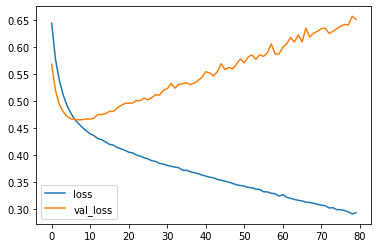

In [98]:
#plot the loss and validation loss of the dataset
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['val_loss'], label='val_loss')

plt.legend()

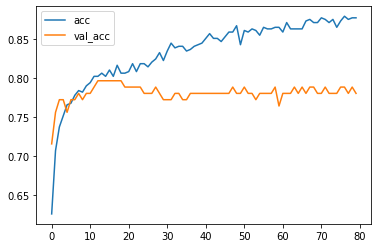

In [99]:
plt.plot(history_df['accuracy'], label='acc')
plt.plot(history_df['val_accuracy'], label='val_acc')

plt.legend()

In [100]:
#Prediction
y_pred = model.predict(X_test)

In [101]:
y_test

,Outcome
661,1.0
122,0.0
113,0.0
14,1.0
529,0.0
...,...
476,1.0
482,0.0
230,1.0
527,0.0


In [102]:
y_pred

array([[9.96379435e-01],
       [2.04944015e-02],
       [8.49865079e-02],
       [4.76335704e-01],
       [9.17619467e-03],
       [1.12321973e-03],
       [9.63038206e-01],
       [7.46114492e-01],
       [2.44444102e-01],
       [5.00045717e-01],
       [8.64211977e-01],
       [7.93187499e-01],
       [8.20156932e-02],
       [4.14151847e-02],
       [3.82667661e-01],
       [1.85579747e-01],
       [9.79308248e-01],
       [1.58280134e-04],
       [2.01905578e-01],
       [6.10695124e-01],
       [7.20074415e-01],
       [3.91665399e-02],
       [8.15728009e-02],
       [2.46120155e-01],
       [3.46819579e-05],
       [4.65529084e-01],
       [1.76787376e-04],
       [9.93162990e-01],
       [8.66267085e-03],
       [1.32405907e-01],
       [3.80357563e-01],
       [1.57076269e-01],
       [1.90261900e-02],
       [8.68552268e-01],
       [1.47268176e-03],
       [8.38491797e-01],
       [2.58670002e-01],
       [9.93490219e-04],
       [6.64748073e-01],
       [9.50728357e-01],


In [103]:
y_pred = y_pred > 0.5
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [

In [104]:
pred = y_pred.astype('uint8')
pred

array([[1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [105]:
import pandas as pd
from sklearn.metrics import classification_report
#Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       107
         1.0       0.62      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154



## Result Analysis

In this project, Deep Neural Network model is used to classify the Diabetes dataset and classification evaluation matrices were used to evaluate the model.
The classification report of the model is given below:

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       107
         1.0       0.62      0.62      0.62        47
    accuracy                           0.77       154

The accuracy of the used model is 77%. 

## Discussion
In this project, the classification of **"Diabetes Dataset"** using Deep Neural Network model is done. First the Libraries for implementing Deep Learning model was taken. A sequential DNN model was made consisting of Dense layers and Sigmoid activation function. RMSProp optimizer and binary cross-entrophy loss function was used. Confusion matrix was used to evaluate the model using Precision, Recall and F1-Score. The accuracy was also measured using Classification report library function. Before traing in DNN model, the dataset was preprocessed like encoded, missing file fillup and feature scaling was done. 